In [4]:
!pwd
!ls

/c/Users/wqw/Desktop/code/mycode/wangqiwen/jupyter
cluster_job.ipynb
draw.ipynb
model.ipynb
scikit-learn-example.ipynb
test_pandas_numpy.ipynb
text_process.ipynb
word2vec.ipynb


In [13]:
%%bash
pip install seaborn
ls

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\wqw\AppData\Local\pip\Cache\wheels\26\0a\44\53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn


Could not install packages due to an EnvironmentError: [WinError 5] 拒绝访问。: 'c:\\program files (x86)\\python\\Lib\\site-packages\\seaborn'
Consider using the `--user` option or check the permissions.



In [5]:
print('hello')
#shift+enter, alt,ctrl

hello


# iris数据集简介
- iris数据集: 安德森鸢尾花卉数据集，英文全称是Anderson’s Iris data set
## 数据格式
- iris包含150个样本，每行数据包含四个特征和类别，iris数据集是一个150行5列的二维表
   - 4个特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度
   - 1个目标：3个类别，山鸢尾、变色鸢尾还是维吉尼亚鸢尾,setosa, versicolor, virginica
iris的每个样本都包含了品种信息，即目标属性（第5列，也叫target或label）。
- 特征
![特征](http://www.bogotobogo.com/python/scikit-learn/images/features/iris-data-set.png)
- 目标
![目标](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)
## 示例
- 示例

| Sepal length| Sepal width| Petal length| Petal width| Species| 
|---|---|:---:|---:|:---|
| 5.1| 3.5| 1.4| 0.2| I. setosa| 
| 4.9| 3| 1.4| 0.2| I. setosa| 
| 4.7| 3.2| 1.3| 0.2| I. setosa| 
| 4.6| 3.1| 1.5| 0.2| I. setosa| 
| 5| 3.6| 1.4| 0.3| I. setosa| 
- 局部截图
![数据示例](http://datahref.com/wp-content/uploads/2016/06/2016-06-03-12-32-40%E5%B1%8F%E5%B9%95%E6%88%AA%E5%9B%BE.png)
## 数据分析
特征两两组合
![相关图](http://datahref.com/wp-content/uploads/2016/06/Iris_dataset_scatterplot.svg_.png)

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
#print iris.data
#print iris.target
x_data,y = iris.data, iris.target
x_name = iris.feature_names

In [13]:
x_data.shape
#x_data.#shift+tab函数方法
#x_data#tab自动补全+方法提示
#x_name
#y.shape
#iris.target_names
#x_data.head()#pandas结构

(150, 4)

In [10]:
#使用make_classification构造1000个样本，每个样本有20个feature
#from sklearn.datasets import make_classification
#x_data, y = make_classification(1000, n_features=20, n_informative=2, n_redundant=2, n_classes=2, random_state=0)
#cols = [i for i in range(20)] + ['class']

In [16]:
import numpy as np
from pandas import DataFrame
c=np.hstack((x_data, y[:, None]))
dh=DataFrame(c,columns=x_name+['species'])

In [17]:
x_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
#存为dataframe格式
from pandas import DataFrame # 共用index的Series结构

cols = x_name + ['species']
#numpy科学计算工具箱
import numpy as np
df_iris = DataFrame(np.hstack((x_data, y[:, None])),columns = cols)
#df = DataFrame(np.hstack((X, y[:, None])),columns = range(20) + ["Species"])
df_iris[:5]
#df_iris.iloc[:5,:3]  #ix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [23]:
raw_col = df_iris.columns#['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', 'classes']
#重新命名
df_iris.columns = [i.replace(' ','').strip('(cm)') for i in raw_col]
#df_iris['sepallength']
#df_iris['species']
df_iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'], dtype='object')

# seaborn用法
[用数据可视化直观理解数据--iris数据集为例](https://blog.csdn.net/u013527419/article/details/69567347)

比较常用的图表有：
1. 查看目标变量的分布。当分布不平衡时，根据评分标准和具体模型的使用不同，可能会严重影响性能。 
   - df_iris['species'].value_counts()
1. 对 Numerical Variable，可以用 Box Plot 来直观地查看它的分布。 
   - sns.boxplot(x='species', y='petallength', data=df_iris)
1. 对于坐标类数据，可以用 Scatter Plot 来查看它们的分布趋势和是否有离群点的存在。 
   - df_iris.plot(kind='scatter', x='sepallength', y='sepalwidth') 
   - sns.jointplot(x='sepallength', y='sepalwidth', data=df_iris, size=5)
1. 对于分类问题，将数据根据 Label 的不同着不同的颜色绘制出来，这对 Feature 的构造很有帮助。 
   - sns.FacetGrid(df_iris,hue='species',size=5).map(plt.scatter,'sepallength','sepalwidth').add_legend()
1. 绘制变量之间两两的分布和相关度图表。 
   - sns.pairplot(df_iris, hue='species', size=3) 
   - sns.pairplot(df_iris, hue='species', size=3, diag_kind='kde')

In [78]:
df_iris['species'].value_counts()

2.0    50
1.0    50
0.0    50
Name: species, dtype: int64

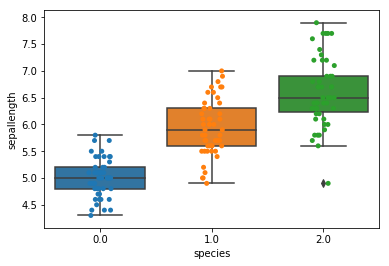

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='species', y='sepallength', data=df_iris)
ax = sns.stripplot(x="species", y="sepallength", data=df_iris, jitter=True, edgecolor="gray")
#plt.grid()
#plt.xlabel('x')
plt.show()

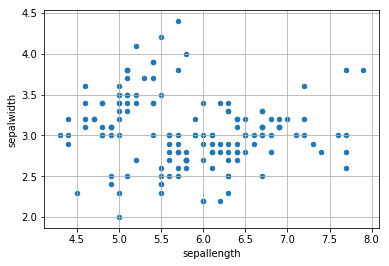

In [38]:
df_iris.plot(kind='scatter', x='sepallength', y='sepalwidth')
plt.grid()
plt.show()

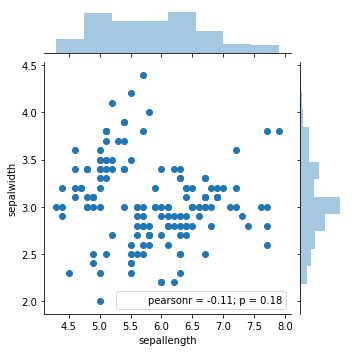

In [92]:
sns.jointplot(x='sepallength', y='sepalwidth', data=df_iris, size=5)
plt.show()

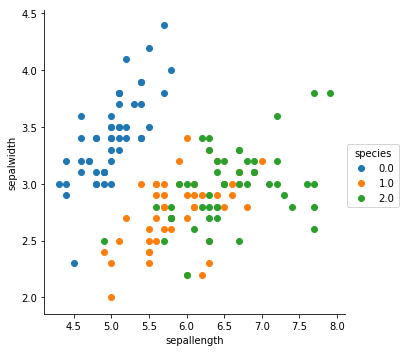

In [93]:
sns.FacetGrid(df_iris,hue='species',size=5).map(plt.scatter,'sepallength','sepalwidth').add_legend()
plt.show()

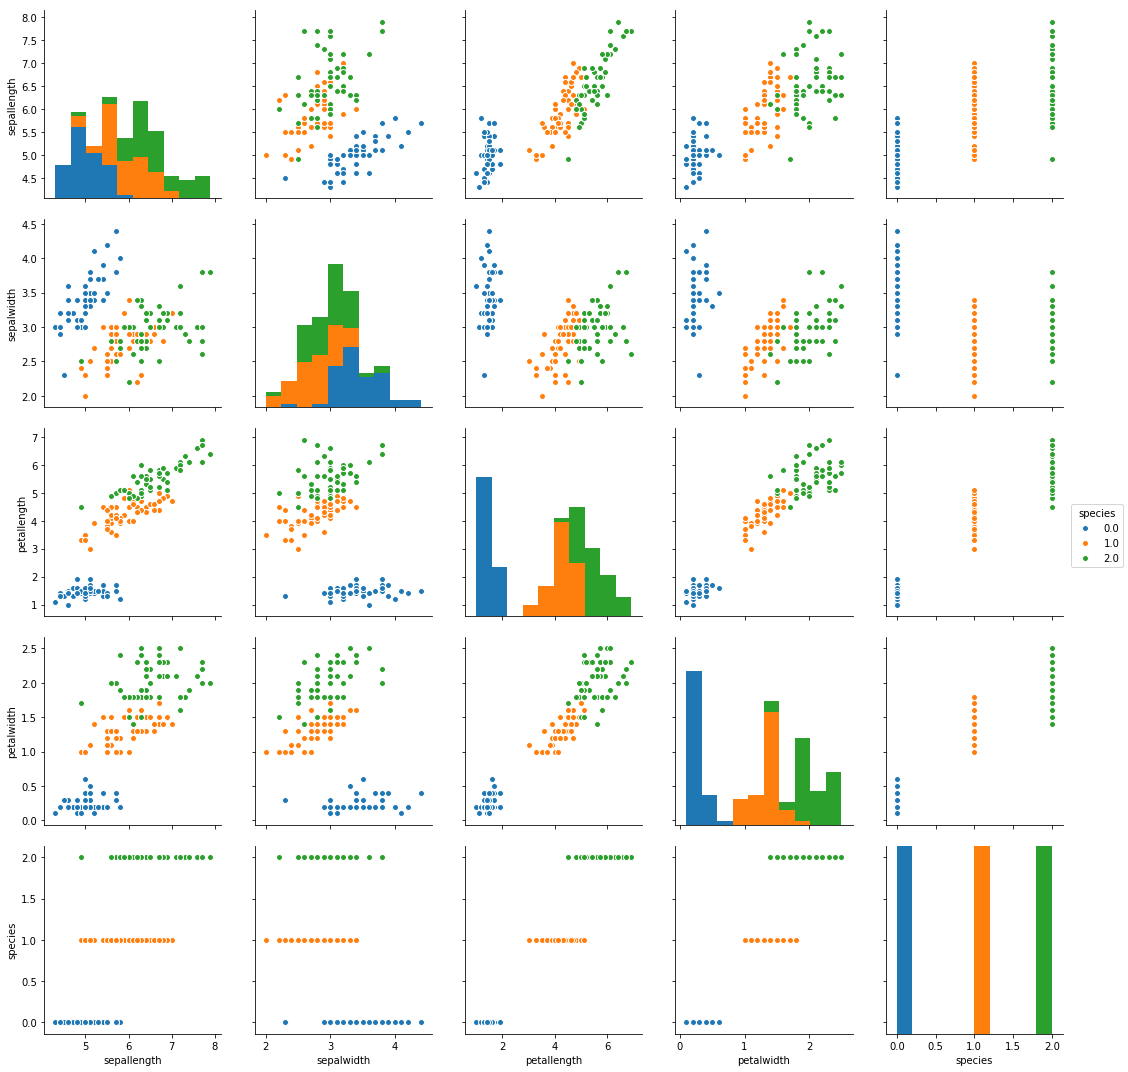

In [97]:
sns.pairplot(df_iris, hue='species', size=3)
plt.show()

In [39]:
# violinplot 小提琴图，查看密度分布，结合了前面的两个图，并且进行了简化
# 数据越稠密越宽，越稀疏越窄
sns.violinplot(x="species", y="petallength", data=df_iris, size=6)

# sns.kdeplot == kernel density 核密度图（单个变量）
sns.FacetGrid(df_iris, hue="species", size=6).map(sns.kdeplot, "petallength").add_legend()
sns.pairplot(df_iris, hue='species', size=3, diag_kind='kde')
plt.show()


LinAlgError: singular matrix

# 作业一
- 解决以上bug

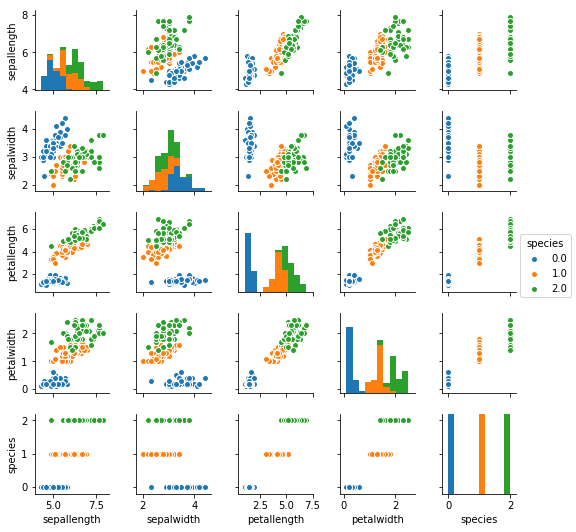

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
#使用pairplot去看不同特征维度pair下数据的空间分布状况
_ = sns.pairplot(df_iris,vars=df_iris.columns,hue="species", size=1.5)
plt.show()

In [40]:
# 画各特征之间的相关性
plt.figure(figsize=(10, 10))
_ = sns.boxplot(df_iris,x='sepallength',y='species')
plt.show()

TypeError: boxplot() got multiple values for argument 'x'

# 作业二
- 解决以上bug

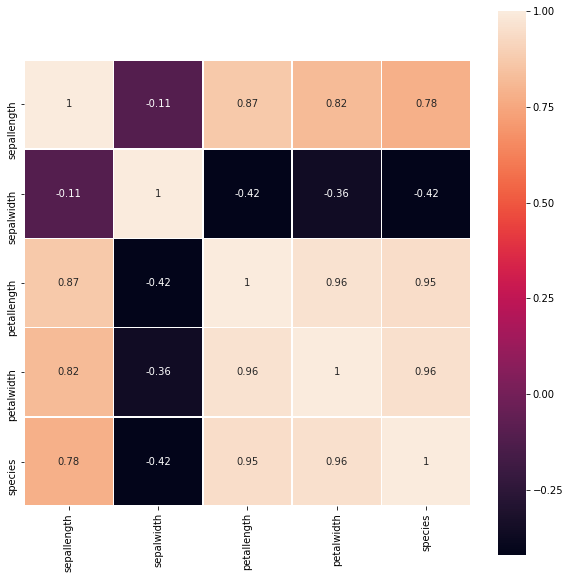

In [43]:
#f, ax = plt.subplots(figsize=(10, 7))
plt.figure(figsize=(10,10))
plt.xticks(rotation='90')
sns.heatmap(df_iris.corr(), square=True, linewidths=.5, annot=True)
plt.show()

- seaborn更多用法参考：[Python数据可视化-seaborn](https://www.cnblogs.com/onemorepoint/p/8306885.html)

In [18]:
# 数据标准化
from sklearn import preprocessing
import pandas as pd
#iris_normalize = preprocessing.normalize(iris.data)
#iris_standardize = preprocessing.scale(iris.data)
x=[[12,4,1],[13,5,2],[18,6,1],[20,6,2],[14,5,1]]
print('\n 原始数据： \n',pd.DataFrame(x))
iris_normalize = preprocessing.normalize(x)
print('\n normalize方法（正则化到单位向量）：\n',pd.DataFrame(iris_normalize))
iris_standardize = preprocessing.scale(x)
print('\n scale方法（标准正态分布）：\n',pd.DataFrame(iris_standardize))
iris_standardize.mean(axis=0)
iris_standardize.std(axis=0)


 原始数据： 
     0  1  2
0  12  4  1
1  13  5  2
2  18  6  1
3  20  6  2
4  14  5  1

 normalize方法（正则化到单位向量）：
           0         1         2
0  0.945732  0.315244  0.078811
1  0.923870  0.355335  0.142134
2  0.947368  0.315789  0.052632
3  0.953463  0.286039  0.095346
4  0.939618  0.335578  0.067116

 scale方法（标准正态分布）：
           0         1         2
0 -1.106606 -1.603567 -0.816497
1 -0.781133 -0.267261  1.224745
2  0.846228  1.069045 -0.816497
3  1.497172  1.069045  1.224745
4 -0.455661 -0.267261 -0.816497


array([ 1.,  1.,  1.])

In [19]:
# 罗辑回归示例
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# 使用鸢尾花数据集
X = iris.data
y = iris.target
model = LogisticRegression()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X) #训练集和测试集要区分开！
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
#print('=====')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


# 作业三
- 矫正以上错误！训练集+测试集要分开

In [20]:
# 朴素贝叶斯示例
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [43]:
# K近邻示例
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [21]:
# 决策树示例
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [48]:
# 支持向量机分类示例
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC()
model.fit(X, y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      0.96      0.98        50
          2       0.96      1.00      0.98        50

avg / total       0.99      0.99      0.99       150

[[50  0  0]
 [ 0 48  2]
 [ 0  0 50]]


In [22]:
# 正则化参数寻优
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X, y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
0.0
1.0


c:\program files (x86)\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\program files (x86)\python\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


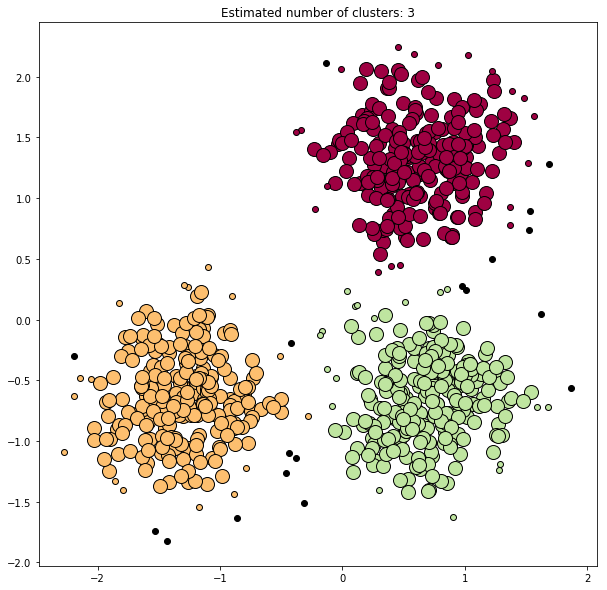

In [23]:
# DBSCAN算法
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

##############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

##############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [1]:
# encoding=utf-8
import pylab as pl
from collections import defaultdict,Counter
import pandas as pd
import numpy as np
import sys

# 读取数据 D:\work\用户建模画像\家公司挖掘\code\warren.xls
print '开始读取数据'
# 数据格式：time lon lat adcode geohash
df = pd.read_excel('C:\Users\warren\Desktop\warren.xlsx')
#df.head()
print '提取经纬度信息'
data = df.iloc[:,[1,2]] # 提取经纬度信息
print data
exit()
#points = data.values.tolist()
points = data[:100].values.tolist()
#x=raw_input()

points = [[int(eachpoint.split("#")[0]), int(eachpoint.split("#")[1])] for eachpoint in open("points","r")]
# 计算每个数据点相邻的数据点，邻域定义为以该点为中心以边长为2*EPs的网格
Eps = 10
surroundPoints = defaultdict(list)
for idx1,point1 in enumerate(points):
  for idx2,point2 in enumerate(points):
    if (idx1 < idx2):
      if(abs(point1[0]-point2[0])<=Eps and abs(point1[1]-point2[1])<=Eps):
        surroundPoints[idx1].append(idx2)
        surroundPoints[idx2].append(idx1)
# 定义邻域内相邻的数据点的个数大于4的为核心点
MinPts = 5
corePointIdx = [pointIdx for pointIdx,surPointIdxs in surroundPoints.iteritems() if len(surPointIdxs)>=MinPts]
# 邻域内包含某个核心点的非核心点，定义为边界点
borderPointIdx = []
for pointIdx,surPointIdxs in surroundPoints.iteritems():
  if (pointIdx not in corePointIdx):
    for onesurPointIdx in surPointIdxs:
      if onesurPointIdx in corePointIdx:
        borderPointIdx.append(pointIdx)
        break
# 噪音点既不是边界点也不是核心点
noisePointIdx = [pointIdx for pointIdx in range(len(points)) if pointIdx not in corePointIdx and pointIdx not in borderPointIdx]
corePoint = [points[pointIdx] for pointIdx in corePointIdx] 
borderPoint = [points[pointIdx] for pointIdx in borderPointIdx]
noisePoint = [points[pointIdx] for pointIdx in noisePointIdx]
# pl.plot([eachpoint[0] for eachpoint in corePoint], [eachpoint[1] for eachpoint in corePoint], 'or')
# pl.plot([eachpoint[0] for eachpoint in borderPoint], [eachpoint[1] for eachpoint in borderPoint], 'oy')
# pl.plot([eachpoint[0] for eachpoint in noisePoint], [eachpoint[1] for eachpoint in noisePoint], 'ok')
groups = [idx for idx in range(len(points))]
# 各个核心点与其邻域内的所有核心点放在同一个簇中
for pointidx,surroundIdxs in surroundPoints.iteritems():
  for oneSurroundIdx in surroundIdxs:
    if (pointidx in corePointIdx and oneSurroundIdx in corePointIdx and pointidx < oneSurroundIdx):
      for idx in range(len(groups)):
        if groups[idx] == groups[oneSurroundIdx]:
          groups[idx] = groups[pointidx]
# 边界点跟其邻域内的某个核心点放在同一个簇中
for pointidx,surroundIdxs in surroundPoints.iteritems():
  for oneSurroundIdx in surroundIdxs:
    if (pointidx in borderPointIdx and oneSurroundIdx in corePointIdx):
      groups[pointidx] = groups[oneSurroundIdx]
      break
# 取簇规模最大的5个簇
wantGroupNum = 3
finalGroup = Counter(groups).most_common(3)
finalGroup = [onecount[0] for onecount in finalGroup]
group1 = [points[idx] for idx in xrange(len(points)) if groups[idx]==finalGroup[0]]
group2 = [points[idx] for idx in xrange(len(points)) if groups[idx]==finalGroup[1]]
group3 = [points[idx] for idx in xrange(len(points)) if groups[idx]==finalGroup[2]]
pl.plot([eachpoint[0] for eachpoint in group1], [eachpoint[1] for eachpoint in group1], 'or')
pl.plot([eachpoint[0] for eachpoint in group2], [eachpoint[1] for eachpoint in group2], 'oy')
pl.plot([eachpoint[0] for eachpoint in group3], [eachpoint[1] for eachpoint in group3], 'og')
# 打印噪音点，黑色
pl.plot([eachpoint[0] for eachpoint in noisePoint], [eachpoint[1] for eachpoint in noisePoint], 'ok')  
pl.show()

开始读取数据


IOError: [Errno 2] No such file or directory: 'C:\\Users\\warren\\Desktop\\warren.xlsx'

In [24]:
# encoding:utf8
# GBDT demo，详见：http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#example-ensemble-plot-gradient-boosting-regression-py
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

###############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13) # 样本数据混排,
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

###############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
        

Automatically created module for IPython interactive environment


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1